In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prediction/House_prediction.csv


In [58]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
#os.chdir("../input/house-prediction")

# The aim is to analyse data and build a housing price prediction model

In [60]:
data = pd.read_csv("House_prediction.csv")
data.head()


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [61]:
data.describe(include  = "all")

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692,10692.000000,10692.000000,10692.000000,10692.000000,10692,10692,10692,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
unique,5,NaN,NaN,NaN,NaN,35,2,2,NaN,NaN,NaN,NaN,NaN
top,São Paulo,NaN,NaN,NaN,NaN,-,acept,not furnished,NaN,NaN,NaN,NaN,NaN
freq,5887,NaN,NaN,NaN,NaN,2461,8316,8086,NaN,NaN,NaN,NaN,NaN
mean,NaN,149.217920,2.506079,2.236813,1.609147,NaN,NaN,NaN,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,NaN,537.016942,1.171266,1.407198,1.589521,NaN,NaN,NaN,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,NaN,11.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,NaN,56.000000,2.000000,1.000000,0.000000,NaN,NaN,NaN,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,NaN,90.000000,2.000000,2.000000,1.000000,NaN,NaN,NaN,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,NaN,182.000000,3.000000,3.000000,2.000000,NaN,NaN,NaN,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03


In [62]:
data['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

1. The data is available for 5 cities,
2. First we need to take care of the nans in dataset

# 1. City wise plotting of mean of features such as rent amount, rooms, area, floor, etc.
Through this you will be able to analyse which choice is the most possible(not the most preferable).

In [63]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [64]:
# sorting according to city
data = data.sort_values(by = "city",ignore_index = True)

In [65]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,Belo Horizonte,46,2,1,1,2,acept,not furnished,200,1050,27,14,1291
1,Belo Horizonte,476,3,2,2,-,not acept,not furnished,0,6100,202,101,6403
2,Belo Horizonte,44,1,1,1,15,acept,not furnished,550,3400,222,46,4218
3,Belo Horizonte,308,4,5,4,18,acept,furnished,1750,15000,167,200,17120
4,Belo Horizonte,320,4,5,4,6,not acept,not furnished,3480,5000,940,67,9487


In [66]:
# taking care of column names to avoid errors
data.rename(columns = {"hoa (R$)":"hoa","rent amount (R$)":"rent amount", "property tax (R$)": "property tax","fire insurance (R$)":"fire insurance",
                      "total (R$)":"total"},inplace = True)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            10692 non-null  object
 1   area            10692 non-null  int64 
 2   rooms           10692 non-null  int64 
 3   bathroom        10692 non-null  int64 
 4   parking spaces  10692 non-null  int64 
 5   floor           10692 non-null  object
 6   animal          10692 non-null  object
 7   furniture       10692 non-null  object
 8   hoa             10692 non-null  int64 
 9   rent amount     10692 non-null  int64 
 10  property tax    10692 non-null  int64 
 11  fire insurance  10692 non-null  int64 
 12  total           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [68]:
# checking for nans and changing values of columns "animal" and "furniture" to 0s ans 1s
data.replace("-",np.nan,inplace = True)

# in floor column : replacing - to 0;
for col in data:
    print("column name: ",col)
    print(data[col].isnull().sum())

column name:  city
0
column name:  area
0
column name:  rooms
0
column name:  bathroom
0
column name:  parking spaces
0
column name:  floor
2461
column name:  animal
0
column name:  furniture
0
column name:  hoa
0
column name:  rent amount
0
column name:  property tax
0
column name:  fire insurance
0
column name:  total
0


it can be seen that floor column has a lot of nan values, 2461 out of 10,000 which is a lot

hence replacing it with 0 would not be suitable. 

Therefore, the nan values are replaced with the mean

In [69]:
mean = data['floor'].astype('float').mean(axis = 0)
print("The mean value is {}".format(int(mean)))
data.replace(np.nan,int(mean),inplace = True)

The mean value is 6


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            10692 non-null  object
 1   area            10692 non-null  int64 
 2   rooms           10692 non-null  int64 
 3   bathroom        10692 non-null  int64 
 4   parking spaces  10692 non-null  int64 
 5   floor           10692 non-null  object
 6   animal          10692 non-null  object
 7   furniture       10692 non-null  object
 8   hoa             10692 non-null  int64 
 9   rent amount     10692 non-null  int64 
 10  property tax    10692 non-null  int64 
 11  fire insurance  10692 non-null  int64 
 12  total           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


Data type of floor can be changed to int now

In [71]:
data['floor'] = data['floor'].astype('int64')

In [72]:
## statistical summary of the data
data.describe(include = "all")

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
count,10692,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692,10692,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
unique,5,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN
top,São Paulo,NaN,NaN,NaN,NaN,NaN,acept,not furnished,NaN,NaN,NaN,NaN,NaN
freq,5887,NaN,NaN,NaN,NaN,NaN,8316,8086,NaN,NaN,NaN,NaN,NaN
mean,NaN,149.217920,2.506079,2.236813,1.609147,6.449027,NaN,NaN,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,NaN,537.016942,1.171266,1.407198,1.589521,5.404949,NaN,NaN,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,NaN,11.000000,1.000000,1.000000,0.000000,1.000000,NaN,NaN,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,NaN,56.000000,2.000000,1.000000,0.000000,3.000000,NaN,NaN,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,NaN,90.000000,2.000000,2.000000,1.000000,6.000000,NaN,NaN,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,NaN,182.000000,3.000000,3.000000,2.000000,8.000000,NaN,NaN,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03


In [73]:
# animal and furniture columns have 2 unique values, these can be handeled using dummy encoding 
#data = pd.get_dummies(data, columns = {"animal","furniture"})

In [74]:
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,Belo Horizonte,46,2,1,1,2,acept,not furnished,200,1050,27,14,1291
1,Belo Horizonte,476,3,2,2,6,not acept,not furnished,0,6100,202,101,6403
2,Belo Horizonte,44,1,1,1,15,acept,not furnished,550,3400,222,46,4218
3,Belo Horizonte,308,4,5,4,18,acept,furnished,1750,15000,167,200,17120
4,Belo Horizonte,320,4,5,4,6,not acept,not furnished,3480,5000,940,67,9487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,São Paulo,16,1,1,0,1,not acept,not furnished,0,850,9,11,870
10688,São Paulo,170,3,2,2,4,acept,furnished,1970,9000,900,115,11990
10689,São Paulo,280,3,5,2,6,acept,not furnished,0,7000,625,106,7731
10690,São Paulo,41,1,1,1,3,acept,furnished,534,2800,133,36,3503


### city wise ploting

                      area        total  cost/area
city                                              
Porto Alegre    103.609388  2989.782900  28.856293
Rio de Janeiro  105.347768  4611.684877  43.775819
Campinas        137.561547  3173.276671  23.068050
São Paulo       158.899439  6380.831833  40.156415
Belo Horizonte  207.411765  6315.242448  30.447851


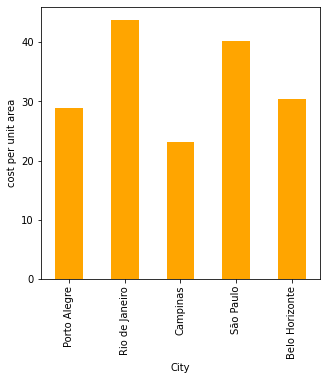

In [75]:
group_1 = data[['city','area','total']]
g1 = group_1.groupby('city').mean()
g1 = g1.sort_values(ascending = True, by = 'area')
g1['cost/area'] = g1['total']/g1['area']
print(g1)

# bar plot for cost per unit area of each city
plt.figure(figsize = (5,5))
g1['cost/area'].plot(kind = "bar",color = "orange")
plt.xlabel("City")
plt.ylabel("cost per unit area")
plt.show()
# cost/area max for rio and min for porto campinas

                   rooms        total    cost/room
city                                              
Porto Alegre    2.140821  2989.782900  1396.558731
Rio de Janeiro  2.243837  4611.684877  2055.266924
Campinas        2.355217  3173.276671  1347.339472
São Paulo       2.558859  6380.831833  2493.624336
Belo Horizonte  3.020668  6315.242448  2090.677632


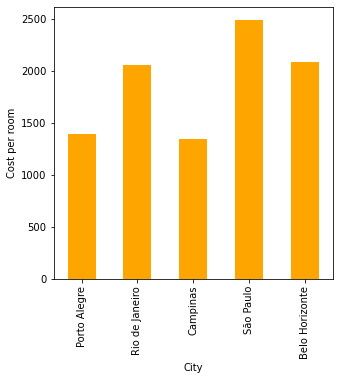

In [76]:
group_2 = data[['city','rooms','total']]
g2 = group_2.groupby('city').mean()
g2 = g2.sort_values(ascending = True, by = 'rooms')
g2['cost/room'] = g2['total']/g2['rooms']
print(g2)

# bar plot for cost per unit area of each city
plt.figure(figsize = (5,5))
g2['cost/room'].plot(kind = "bar",color = "orange")
plt.xlabel("City")
plt.ylabel("Cost per room")
plt.show()
# cost per room is maximum in belo horizonte and minimum in campinas

In [77]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,Belo Horizonte,46,2,1,1,2,acept,not furnished,200,1050,27,14,1291
1,Belo Horizonte,476,3,2,2,6,not acept,not furnished,0,6100,202,101,6403
2,Belo Horizonte,44,1,1,1,15,acept,not furnished,550,3400,222,46,4218
3,Belo Horizonte,308,4,5,4,18,acept,furnished,1750,15000,167,200,17120
4,Belo Horizonte,320,4,5,4,6,not acept,not furnished,3480,5000,940,67,9487


                rent amount        total
city                                    
Porto Alegre    2337.699916  2989.782900
Campinas        2364.290739  3173.276671
Rio de Janeiro  3232.904064  4611.684877
Belo Horizonte  3664.127981  6315.242448
São Paulo       4652.793783  6380.831833


<Figure size 360x360 with 0 Axes>

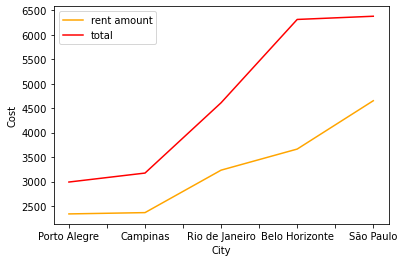

In [78]:
group_3 = data[['city','rent amount','total']]
g3 = group_3.groupby('city').mean()
g3 = g3.sort_values(ascending = True, by = 'rent amount')
print(g3)

# line plot for cost per unit area of each city
plt.figure(figsize = (5,5))
g3[['rent amount','total']].plot(kind = "line",color = ("orange","red"))
plt.xlabel('City')
plt.ylabel("Cost")
plt.show()
# rent amount in maximum in sao paulo and minimum in porto alegre

                   floor        total   cost/floor
city                                              
Porto Alegre    4.894384  2989.782900   610.859908
Belo Horizonte  5.492051  6315.242448  1149.887827
Rio de Janeiro  5.678215  4611.684877   812.171653
Campinas        5.715123  3173.276671   555.242051
São Paulo       7.271446  6380.831833   877.519027


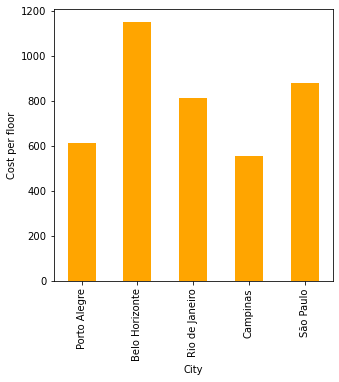

In [79]:
group_4 = data[['city','floor','total']]
g4 = group_4.groupby('city').mean()
g4['cost/floor'] = g4['total']/g4['floor']
g4 = g4.sort_values(ascending = True, by = 'floor')

print(g4)

# bar plot for cost per unit area of each city
plt.figure(figsize = (5,5))
g4['cost/floor'].plot(kind = "bar",color = "orange")
plt.xlabel("City")
plt.ylabel("Cost per floor")
plt.show()
# cost per floor is maximum for porto alegre and minimum for campinas

# Try to find a dependence of House Association Tax, property tax and fire insurance on other features. Not a formula but something intuitive like if it is increasing/decreasing with no of rooms or being furnished or not.

Correlation with rent amount

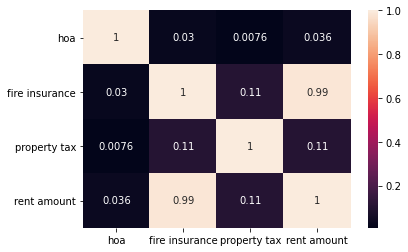

In [80]:
df_corr_rent = data[['hoa','fire insurance','property tax','rent amount']]
corr_matrix = df_corr_rent.corr()
sns.heatmap(corr_matrix,annot = True)
plt.show()
# rent amount and fire insurance are highly correlated, so we can use 1 instead of both for the model

In [81]:
data.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa', 'rent amount', 'property tax',
       'fire insurance', 'total'],
      dtype='object')

Correlation with area

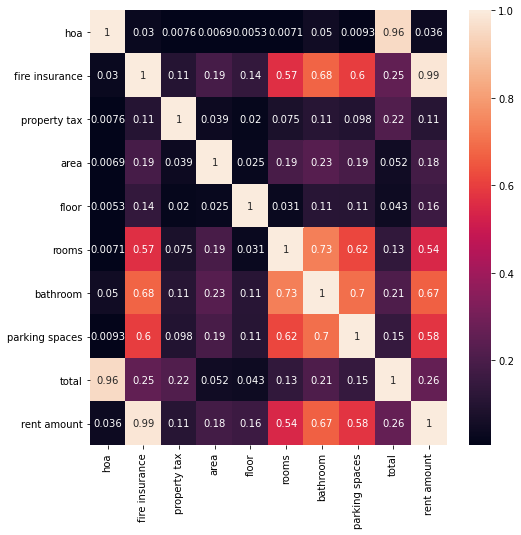

In [88]:
df_corr_rent = data[['hoa','fire insurance','property tax','area','floor','rooms','bathroom','parking spaces','total','rent amount']]
corr_matrix = df_corr_rent.corr()
plt.figure(figsize = (8,8))
sns.heatmap(corr_matrix,annot = True)
plt.show()

by looking at the correlation matrix heatmap it can be seen that:
1. hoa and total are highly correlated
2. fire insurance is correlated with rooms and bathrooms
3. rooms and parking spaces are correlated with each other
4. rooms and bathrooms are also correlated

### Therefore we can use 1 from (rent amount, fire insurance) , (house association tax , total amount) , (fire insurance, bathrooms, rooms, parking spaces), 

## After the dependence of taxes is done, find the dependence of rent amount on other features through Linear Regression.You can use libraries for the results but I would recommend you to go through the maths once.Perform training on first 10000 data rows and predict the rest and compare with the original rent values.

animal and furniture can be handled using label encoder

In [84]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['city'] = le.fit_transform(data['city'])
data['animal'] = le.fit_transform(data['animal'])
data['furniture'] = le.fit_transform(data['furniture'])

In [89]:
# standardising and normalising data

In [90]:
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,46,2,1,1,2,0,1,200,1050,27,14,1291
1,0,476,3,2,2,6,1,1,0,6100,202,101,6403
2,0,44,1,1,1,15,0,1,550,3400,222,46,4218
3,0,308,4,5,4,18,0,0,1750,15000,167,200,17120
4,0,320,4,5,4,6,1,1,3480,5000,940,67,9487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,4,16,1,1,0,1,1,1,0,850,9,11,870
10688,4,170,3,2,2,4,0,0,1970,9000,900,115,11990
10689,4,280,3,5,2,6,0,1,0,7000,625,106,7731
10690,4,41,1,1,1,3,0,0,534,2800,133,36,3503


In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr = LinearRegression()

In [99]:
Y = data[['rent amount']].values
X = data[['fire insurance']].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

0.9753722122963261

In [103]:
test = data.loc[9000:]

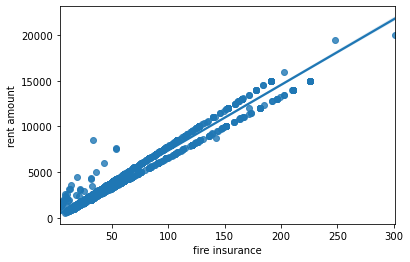

In [107]:
sns.regplot(x="fire insurance", y="rent amount", data=test)

Final model

In [108]:
X = data[['hoa','fire insurance','property tax','rooms','area','floor','total']].values
Y = data[['rent amount']].values

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 0)
lr.fit(X_train, Y_train)
lr.score(X_test,Y_test)

0.999999352805272

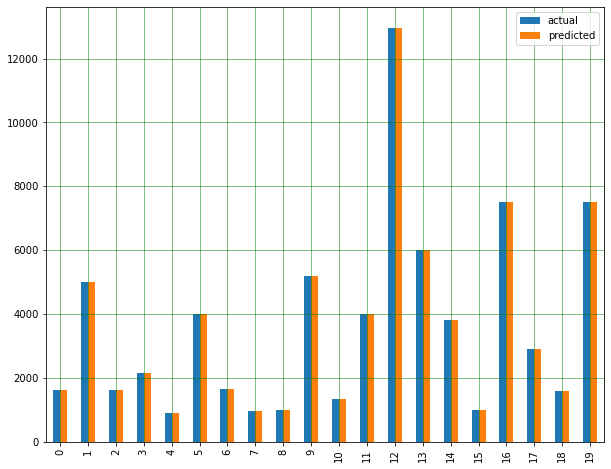

In [110]:
Y_pred = lr.predict(X_test) 
df_compare = pd.DataFrame({'actual':Y_test.flatten(), 'predicted':Y_pred.flatten()})
df_compare
df_compare.head(20).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()